## Extended Data Figure 9

![title](../assets/EDFig9.png)

In [ ]:
%load_ext autoreload
%autoreload 2
import sys
import logging
from pathlib import Path

import yaml
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib_venn
import matplotlib.pyplot as plt

from common import *
sys.path.insert(0, "./prepare_data/")
import connectome_utils
import Figure4_neurons as neurons
import Figure4_graph_tools as graph_tools
import Figure4_generate_grooming_network as gen_network


DATA_PATH = Path(
    "../data"
)
EXPORT_PATH = Path(
    "../results/EDFigure9"
)
EXPORT_PATH.mkdir(exist_ok=True, parents=True)


FIGSIZE = {'width': 1.2, 'length': 0.9}

# disable matplotlib logger
logging.getLogger("matplotlib.font_manager").disabled = True

plt.style.use('./config.mplstyle')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Panel A: graph representation of connectivity between neuron groups

In [2]:
# Just loading the data, if you want to reproduce it, please run prepare_data/EDFigure9_random_graphs.py
random_adj_matrices = np.load(DATA_PATH / "EDFig9_adj_matrices_random.npy", allow_pickle=True)

In [3]:
def draw_graph(
    adjacency_matrix,
    neuron_group_names_pre,
    neuron_group_names_post,
    pos_custom,
    node_colors,
    title="",
    fig_name=None,
    edge_label=False,
    normalize_edge_weight=False,
    threshold=0,
    connectionstyle="arc3,rad=0.1",
):

    # Plot a graph from the adjacency matrix
    neuron_names_pre = [name.replace("_", " ") for name in neuron_group_names_pre]
    neuron_names_post = [name.replace("_", " ") for name in neuron_group_names_post]
    neuron_names = np.unique(neuron_names_pre + neuron_names_post)


    fig, ax = plt.subplots(figsize=(2.4, 2.8), dpi=300)
    edge_color = []
    edge_weight = []
    edges = []

    # create directed graph from transition dataframe
    G = nx.DiGraph()

    for neuron in neuron_names:
        G.add_node(neuron)

    for row in range(adjacency_matrix.shape[0]):
        for column in range(adjacency_matrix.shape[1]):
            if np.abs(adjacency_matrix[row, column]) > threshold:
                # print(
                #     f"{neuron_names_pre[row]} -> {neuron_names_post[column]}: {adjacency_matrix[row, column]}"
                # )
                G.add_edge(
                    neuron_names_pre[row],
                    neuron_names_post[column],
                    weight=np.abs(adjacency_matrix[row, column]),
                )

                edge_color.append(
                    "darkblue" if adjacency_matrix[row, column] < 0 else "darkred"
                )
                edges.append((neuron_names_pre[row], neuron_names_post[column]))
                edge_weight.append(adjacency_matrix[row, column])


    edge_weight = np.array(edge_weight)
    print(edge_weight.min(), edge_weight.max())
    if normalize_edge_weight:
        edge_weight -= (edge_weight.min() - 0.2)
        edge_weight /= (edge_weight.max() - edge_weight.min() - 0.2)
        edge_weight *= 4.5

    # create node and edge labels
    node_labels = {
        node: node.replace(" ", "\n").replace("OTHER", "").replace("NEURONS", "")
        for node in G.nodes()
    }
    edge_labels = {(u, v): round(d["weight"], 1) for u, v, d in G.edges(data=True)}

    # create graph layout and draw nodes, edges, and labels
    pos = pos_custom

    node_size = 300
    nx.draw_networkx_nodes(
        G, pos,
        nodelist=neuron_names,
        node_size=node_size,
        node_shape="s",
        node_color=[node_colors[name] for name in G.nodes()],
        alpha=1,
        edgecolors="black",
    )
    print(G.edges())
    nx.draw_networkx_edges(
        G, pos,
        # node_size=node_size,
        edgelist=edges,
        width=edge_weight,
        arrows=True,
        edge_color="black",  # edge_color,
        connectionstyle=connectionstyle,
        alpha=1,
    )
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=5)

    if edge_label:
        nx.draw_networkx_edge_labels(
            G,
            pos,
            edge_labels=edge_labels,
            font_size=3,
            rotate=False,
            label_pos=0.35,
        )

    # display graph
    plt.axis("off")
    ax.margins(0.1)
    ax.set_title(title)

    if fig_name is not None:
        fig.savefig(
            EXPORT_PATH / f"{fig_name}.png",
            bbox_inches="tight",
            facecolor="white"
        )

    plt.show()

    return G, edge_weight

0.23659966492970064 3.2432431336742185
[('ANTEN PREM', 'CENT.'), ('ANTEN PREM', 'ANTEN PREM'), ('ANTEN PREM', 'NECK PREM'), ('ANTEN PREM', 'ANTEN MN'), ('CENT.', 'CENT.'), ('CENT.', 'ANTEN PREM'), ('CENT.', 'NECK PREM'), ('CENT.', 'LEG PREM'), ('CENT.', 'SHARED PREM'), ('JO-F', 'CENT.'), ('JO-F', 'ANTEN PREM'), ('JO-F', 'NECK PREM'), ('LEG PREM', 'CENT.'), ('LEG PREM', 'ANTEN PREM'), ('LEG PREM', 'NECK PREM'), ('LEG PREM', 'NECK MN'), ('NECK PREM', 'CENT.'), ('NECK PREM', 'ANTEN PREM'), ('NECK PREM', 'NECK PREM'), ('NECK PREM', 'NECK MN'), ('SHARED PREM', 'CENT.'), ('SHARED PREM', 'NECK PREM'), ('SHARED PREM', 'ANTEN MN'), ('SHARED PREM', 'NECK MN')]


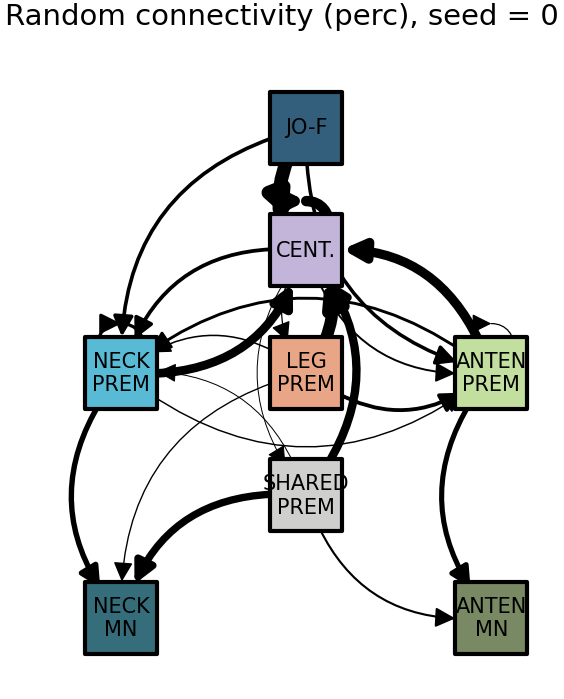

0.2332361482035547 3.0411196847563517
[('ANTEN PREM', 'CENT.'), ('ANTEN PREM', 'ANTEN PREM'), ('ANTEN PREM', 'NECK PREM'), ('ANTEN PREM', 'ANTEN MN'), ('CENT.', 'CENT.'), ('CENT.', 'ANTEN PREM'), ('CENT.', 'NECK PREM'), ('JO-F', 'CENT.'), ('JO-F', 'NECK PREM'), ('JO-F', 'NECK MN'), ('LEG PREM', 'CENT.'), ('LEG PREM', 'ANTEN PREM'), ('LEG PREM', 'NECK PREM'), ('LEG PREM', 'LEG PREM'), ('LEG PREM', 'SHARED PREM'), ('NECK PREM', 'CENT.'), ('NECK PREM', 'ANTEN PREM'), ('NECK PREM', 'NECK PREM'), ('NECK PREM', 'NECK MN'), ('SHARED PREM', 'CENT.'), ('SHARED PREM', 'ANTEN PREM'), ('SHARED PREM', 'NECK PREM'), ('SHARED PREM', 'LEG PREM'), ('SHARED PREM', 'SHARED PREM'), ('SHARED PREM', 'ANTEN MN'), ('SHARED PREM', 'NECK MN')]


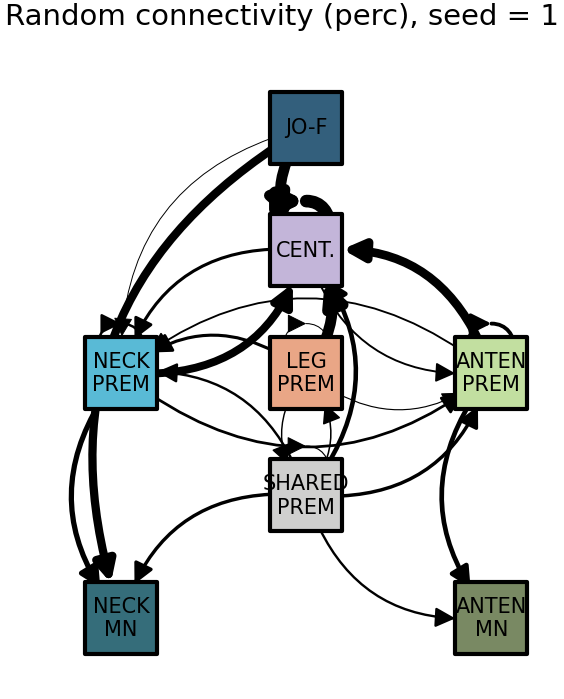

0.20079325631733638 3.092010673460648
[('ANTEN PREM', 'CENT.'), ('ANTEN PREM', 'NECK PREM'), ('ANTEN PREM', 'LEG PREM'), ('ANTEN PREM', 'ANTEN MN'), ('CENT.', 'CENT.'), ('CENT.', 'ANTEN PREM'), ('CENT.', 'NECK PREM'), ('CENT.', 'LEG PREM'), ('CENT.', 'SHARED PREM'), ('JO-F', 'CENT.'), ('JO-F', 'LEG PREM'), ('JO-F', 'NECK MN'), ('LEG PREM', 'CENT.'), ('LEG PREM', 'ANTEN PREM'), ('LEG PREM', 'NECK PREM'), ('LEG PREM', 'SHARED PREM'), ('LEG PREM', 'NECK MN'), ('NECK PREM', 'CENT.'), ('NECK PREM', 'ANTEN PREM'), ('NECK PREM', 'NECK PREM'), ('NECK PREM', 'LEG PREM'), ('NECK PREM', 'NECK MN'), ('SHARED PREM', 'CENT.'), ('SHARED PREM', 'NECK PREM'), ('SHARED PREM', 'ANTEN MN'), ('SHARED PREM', 'NECK MN')]


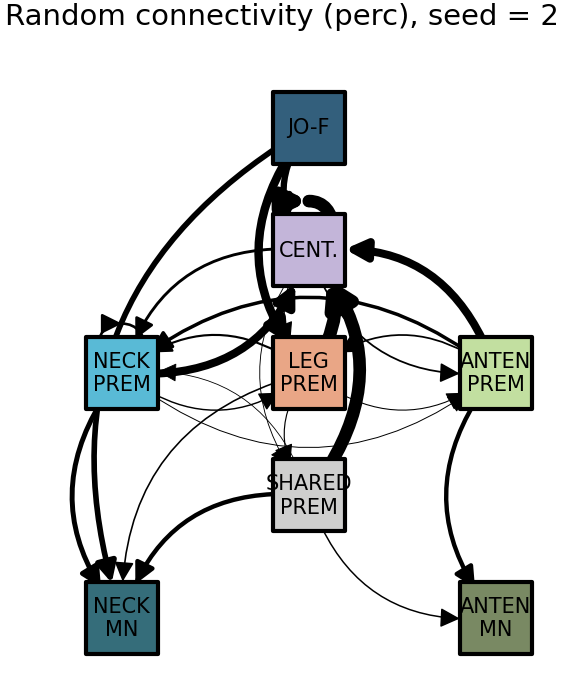

0.21827598883360713 3.2537920708331773
[('ANTEN PREM', 'CENT.'), ('ANTEN PREM', 'ANTEN PREM'), ('ANTEN PREM', 'NECK PREM'), ('ANTEN PREM', 'LEG PREM'), ('ANTEN PREM', 'SHARED PREM'), ('ANTEN PREM', 'ANTEN MN'), ('CENT.', 'CENT.'), ('CENT.', 'ANTEN PREM'), ('CENT.', 'NECK PREM'), ('CENT.', 'LEG PREM'), ('CENT.', 'SHARED PREM'), ('JO-F', 'CENT.'), ('JO-F', 'ANTEN PREM'), ('JO-F', 'SHARED PREM'), ('JO-F', 'ANTEN MN'), ('LEG PREM', 'CENT.'), ('LEG PREM', 'ANTEN PREM'), ('LEG PREM', 'NECK PREM'), ('LEG PREM', 'LEG PREM'), ('LEG PREM', 'NECK MN'), ('NECK PREM', 'CENT.'), ('NECK PREM', 'ANTEN PREM'), ('NECK PREM', 'NECK PREM'), ('NECK PREM', 'LEG PREM'), ('NECK PREM', 'NECK MN'), ('SHARED PREM', 'CENT.'), ('SHARED PREM', 'ANTEN PREM'), ('SHARED PREM', 'NECK PREM'), ('SHARED PREM', 'LEG PREM'), ('SHARED PREM', 'ANTEN MN'), ('SHARED PREM', 'NECK MN')]


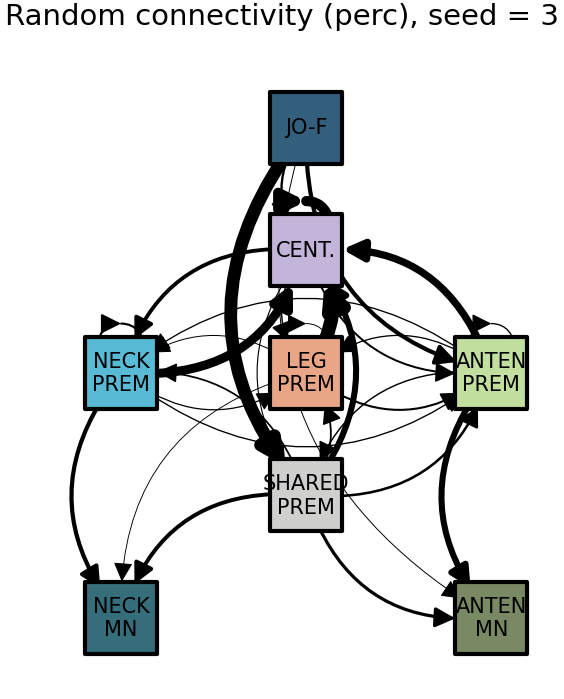

0.21481286184814744 2.636347820279988
[('ANTEN PREM', 'CENT.'), ('ANTEN PREM', 'NECK PREM'), ('ANTEN PREM', 'ANTEN MN'), ('CENT.', 'CENT.'), ('CENT.', 'ANTEN PREM'), ('CENT.', 'NECK PREM'), ('JO-F', 'CENT.'), ('JO-F', 'NECK PREM'), ('JO-F', 'LEG PREM'), ('JO-F', 'SHARED PREM'), ('LEG PREM', 'CENT.'), ('LEG PREM', 'ANTEN PREM'), ('LEG PREM', 'NECK PREM'), ('LEG PREM', 'LEG PREM'), ('LEG PREM', 'ANTEN MN'), ('NECK PREM', 'CENT.'), ('NECK PREM', 'ANTEN PREM'), ('NECK PREM', 'NECK PREM'), ('NECK PREM', 'LEG PREM'), ('NECK PREM', 'SHARED PREM'), ('NECK PREM', 'NECK MN'), ('SHARED PREM', 'CENT.'), ('SHARED PREM', 'NECK PREM'), ('SHARED PREM', 'SHARED PREM'), ('SHARED PREM', 'ANTEN MN'), ('SHARED PREM', 'NECK MN')]


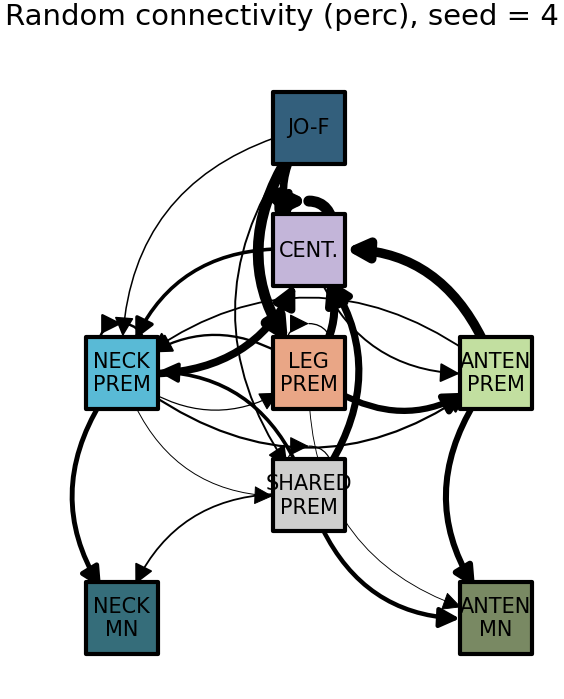

0.23762375767081667 3.5346533953533985
[('ANTEN PREM', 'CENT.'), ('ANTEN PREM', 'ANTEN PREM'), ('ANTEN PREM', 'NECK PREM'), ('ANTEN PREM', 'ANTEN MN'), ('CENT.', 'CENT.'), ('CENT.', 'ANTEN PREM'), ('CENT.', 'NECK PREM'), ('CENT.', 'LEG PREM'), ('JO-F', 'CENT.'), ('JO-F', 'ANTEN PREM'), ('JO-F', 'NECK PREM'), ('JO-F', 'LEG PREM'), ('JO-F', 'SHARED PREM'), ('LEG PREM', 'CENT.'), ('LEG PREM', 'NECK PREM'), ('LEG PREM', 'LEG PREM'), ('LEG PREM', 'NECK MN'), ('NECK PREM', 'CENT.'), ('NECK PREM', 'ANTEN PREM'), ('NECK PREM', 'NECK PREM'), ('NECK PREM', 'NECK MN'), ('SHARED PREM', 'CENT.'), ('SHARED PREM', 'NECK PREM'), ('SHARED PREM', 'LEG PREM'), ('SHARED PREM', 'SHARED PREM'), ('SHARED PREM', 'ANTEN MN'), ('SHARED PREM', 'NECK MN')]


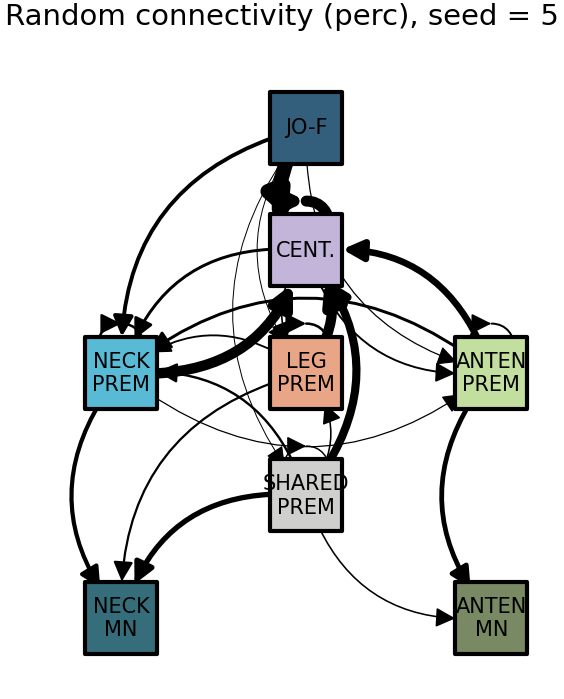

0.20635074751762406 3.6666663174603507
[('ANTEN PREM', 'CENT.'), ('ANTEN PREM', 'ANTEN PREM'), ('ANTEN PREM', 'NECK PREM'), ('ANTEN PREM', 'LEG PREM'), ('ANTEN PREM', 'ANTEN MN'), ('CENT.', 'CENT.'), ('CENT.', 'ANTEN PREM'), ('CENT.', 'NECK PREM'), ('JO-F', 'CENT.'), ('JO-F', 'LEG PREM'), ('JO-F', 'SHARED PREM'), ('JO-F', 'ANTEN MN'), ('LEG PREM', 'CENT.'), ('LEG PREM', 'ANTEN PREM'), ('LEG PREM', 'NECK PREM'), ('NECK PREM', 'CENT.'), ('NECK PREM', 'ANTEN PREM'), ('NECK PREM', 'NECK PREM'), ('NECK PREM', 'SHARED PREM'), ('NECK PREM', 'NECK MN'), ('SHARED PREM', 'CENT.'), ('SHARED PREM', 'ANTEN PREM'), ('SHARED PREM', 'NECK PREM'), ('SHARED PREM', 'ANTEN MN'), ('SHARED PREM', 'NECK MN')]


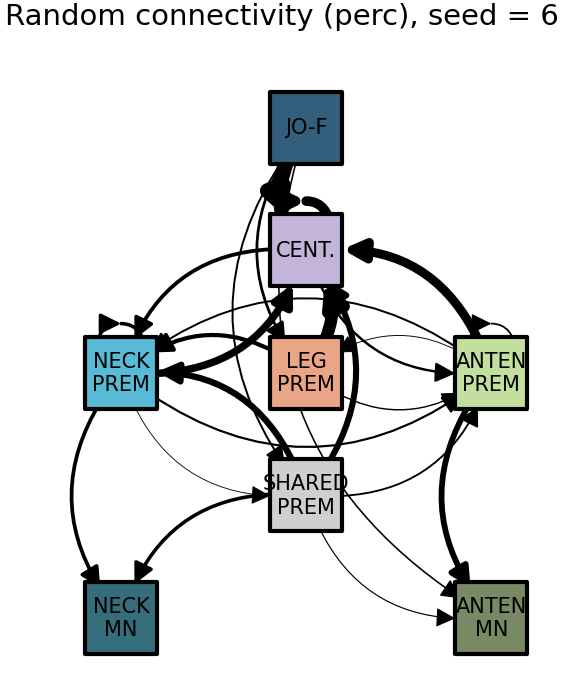

0.20865574464788522 2.802177276588351
[('ANTEN PREM', 'CENT.'), ('ANTEN PREM', 'NECK PREM'), ('ANTEN PREM', 'ANTEN MN'), ('CENT.', 'CENT.'), ('CENT.', 'ANTEN PREM'), ('CENT.', 'NECK PREM'), ('CENT.', 'LEG PREM'), ('JO-F', 'CENT.'), ('JO-F', 'ANTEN PREM'), ('JO-F', 'NECK PREM'), ('LEG PREM', 'CENT.'), ('LEG PREM', 'ANTEN PREM'), ('LEG PREM', 'NECK PREM'), ('LEG PREM', 'LEG PREM'), ('LEG PREM', 'NECK MN'), ('NECK PREM', 'CENT.'), ('NECK PREM', 'ANTEN PREM'), ('NECK PREM', 'NECK PREM'), ('NECK PREM', 'NECK MN'), ('SHARED PREM', 'CENT.'), ('SHARED PREM', 'ANTEN PREM'), ('SHARED PREM', 'NECK PREM'), ('SHARED PREM', 'ANTEN MN'), ('SHARED PREM', 'NECK MN')]


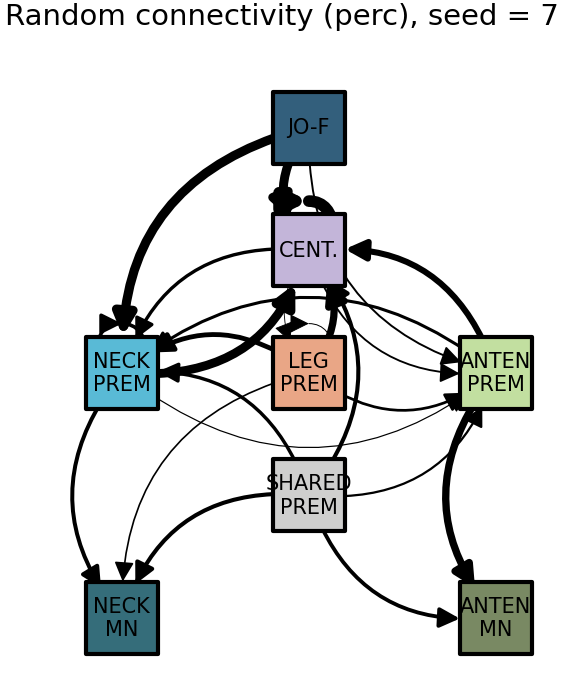

0.22289329817977194 4.694960087666841
[('ANTEN PREM', 'CENT.'), ('ANTEN PREM', 'ANTEN PREM'), ('ANTEN PREM', 'NECK PREM'), ('ANTEN PREM', 'ANTEN MN'), ('CENT.', 'CENT.'), ('CENT.', 'ANTEN PREM'), ('CENT.', 'NECK PREM'), ('JO-F', 'CENT.'), ('LEG PREM', 'CENT.'), ('LEG PREM', 'ANTEN PREM'), ('LEG PREM', 'NECK PREM'), ('NECK PREM', 'CENT.'), ('NECK PREM', 'ANTEN PREM'), ('NECK PREM', 'NECK PREM'), ('NECK PREM', 'NECK MN'), ('SHARED PREM', 'CENT.'), ('SHARED PREM', 'NECK PREM'), ('SHARED PREM', 'ANTEN MN'), ('SHARED PREM', 'NECK MN')]


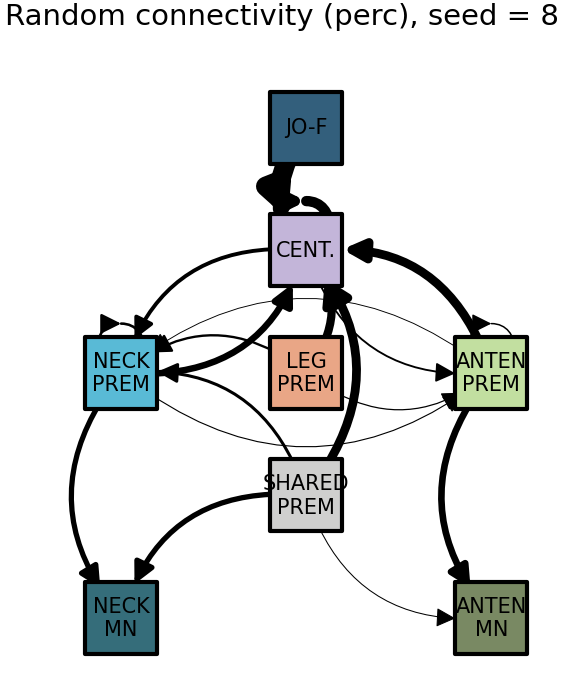

0.20137103598384298 3.3636362617079927
[('ANTEN PREM', 'CENT.'), ('ANTEN PREM', 'ANTEN PREM'), ('ANTEN PREM', 'NECK PREM'), ('ANTEN PREM', 'ANTEN MN'), ('CENT.', 'CENT.'), ('CENT.', 'ANTEN PREM'), ('CENT.', 'NECK PREM'), ('CENT.', 'LEG PREM'), ('JO-F', 'CENT.'), ('JO-F', 'ANTEN PREM'), ('JO-F', 'NECK PREM'), ('JO-F', 'LEG PREM'), ('JO-F', 'ANTEN MN'), ('LEG PREM', 'CENT.'), ('LEG PREM', 'ANTEN PREM'), ('LEG PREM', 'NECK PREM'), ('LEG PREM', 'LEG PREM'), ('NECK PREM', 'CENT.'), ('NECK PREM', 'ANTEN PREM'), ('NECK PREM', 'NECK PREM'), ('NECK PREM', 'NECK MN'), ('SHARED PREM', 'CENT.'), ('SHARED PREM', 'ANTEN PREM'), ('SHARED PREM', 'NECK PREM'), ('SHARED PREM', 'ANTEN MN'), ('SHARED PREM', 'NECK MN')]


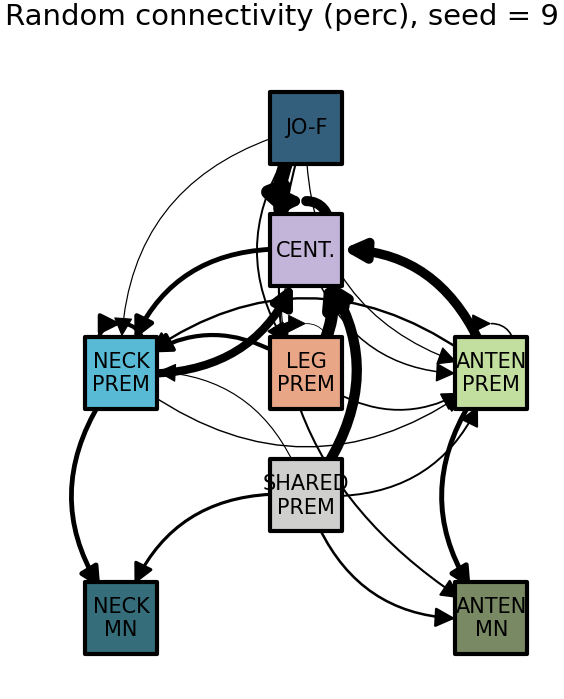

In [4]:
pos_custom = {
    "JO-F": (0.0, 3),
    "CENT.": (-0.0, 2.),
    "ANTEN PREM": (1.2, 1),
    "LEG PREM": (0.0, 1),
    "NECK PREM": (-1.2, 1),
    "SHARED PREM": (0, 0),
    "ANTEN MN": (1.2, -1.),
    "NECK MN": (-1.2, -1.),
}

NODE_COLORS = {
    "JO-F": "#335F7C",
    "CENT.": "#C3B5D9",
    "ANTEN PREM": "#C2DFA0",
    "NECK PREM": "#59BAD6",
    "LEG PREM": "#E9A686",
    "SHARED PREM": "#CFCFCE",
    "ANTEN MN": "#798963",
    "NECK MN": "#356D7A",
}

for random_seed, matrix in enumerate(random_adj_matrices[:10]):
    # no mns as presynaptic neurons and no JOF as postsynaptic neurons
    adj_matrix = matrix['perc'][:-2, 1:]
    graph, edges = draw_graph(
        adj_matrix / 20,
        neuron_group_names_pre=[
            "JO-F",
            "CENT.",
            "ANTEN PREM",
            "NECK PREM",
            "LEG PREM",
            "SHARED PREM",
        ],
        neuron_group_names_post=[
            "CENT.",
            "ANTEN PREM",
            "NECK PREM",
            "LEG PREM",
            "SHARED PREM",
            "ANTEN MN",
            "NECK MN",
        ],
        pos_custom=pos_custom,
        node_colors=NODE_COLORS,
        title=f"Random connectivity (perc), seed = {random_seed}",
        fig_name=f"Figure4_random_perc_{random_seed}",
        normalize_edge_weight=False,
        threshold=0.2,
        edge_label=False,
        connectionstyle="arc3,rad=0.4",

    )

In [5]:
grooming_network = load_data(DATA_PATH / "Fig4_grooming_network_sensory_merged.pkl")
sensory_motor = load_data(DATA_PATH / "Fig4_MN_SN_updated.pkl")

input_central_to_prem_array = graph_tools.get_conn_between_groups(
    grooming_network, sensory_motor
)
# remove the row representing other neurons
real_conn = input_central_to_prem_array[:-1, :].flatten()
pearson_scores = []

for random_seed, matrix in enumerate(random_adj_matrices):
    random_conn = matrix['perc'][:-2, 1:].flatten()
    pear_v = calc_pearson(real_conn, random_conn)
    pearson_scores.append(pear_v)

In [6]:
def get_percentile(distribution, observed_value):
    # Sort the simulated values to form an empirical distribution
    sorted_values = np.sort(distribution)

    # Calculate percentile (proportion of values <= observed_value)
    percentile = (np.sum(distribution <= observed_value) / len(distribution)) * 100
    return percentile

def get_significance(percentile):
    # ***: beyond 99th or below 1st percentile
    if percentile <= 1 or percentile >= 99:
        return "***"
    # **: beyond 97.5th or below 2.5th percentile
    elif percentile <= 2.5 or percentile >= 97.5:
        return "**"
    # *: beyond 95th or below 5th percentile
    elif percentile <= 5 or percentile >= 95:
        return "*"
    else:
        return "n.s."

neuron_group_names_pre=[
    "Sensory (JO-F)",
    "Central",
    "Ant. prem",
    "Neck prem",
    "F.Leg prem",
    "Shared prem",
]
neuron_group_names_post=[
    "Central",
    "Ant. prem",
    "Neck prem",
    "F.Leg prem",
    "Shared prem",
    "Ant. mn",
    "Neck mn",
]

## Panel B

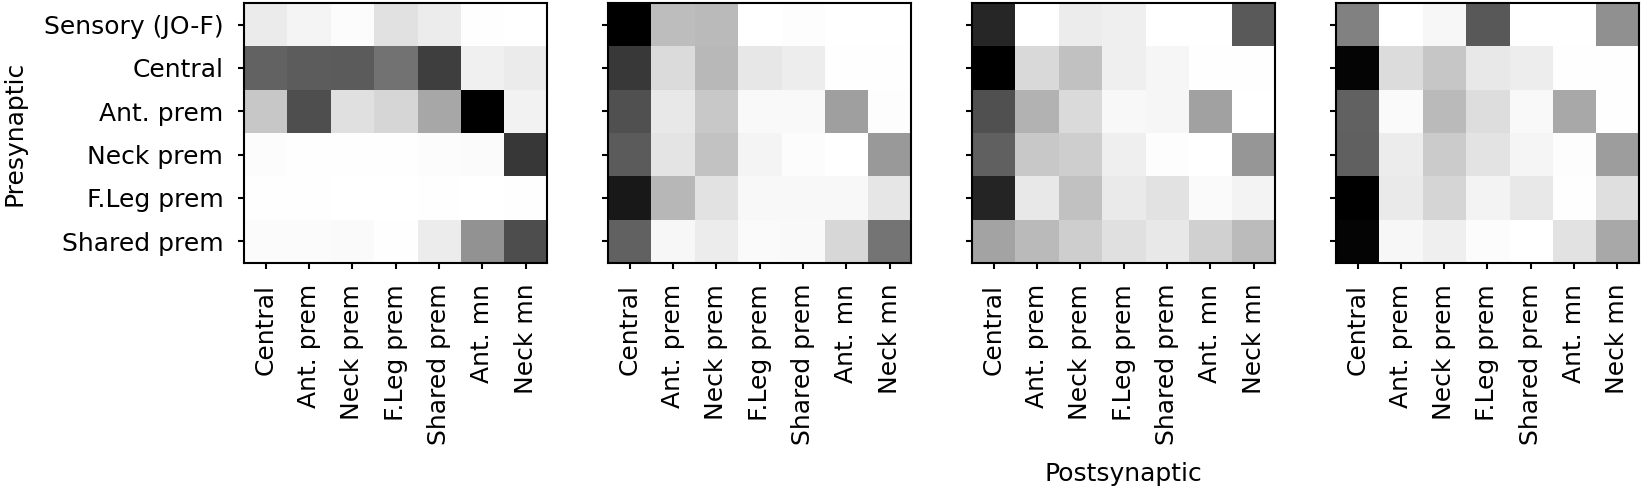

In [7]:
percentage_random_matrices = np.array(
    [arr['perc'][:-2, 1:] for arr in random_adj_matrices]
)
percentage_real_matrix = input_central_to_prem_array[:-1, :]

with plt.style.context("./config.mplstyle"):
    fig, axs = plt.subplots(
        1,
        4,
        figsize=(FIGSIZE["width"] * 5., FIGSIZE["length"] * 2.4),
        sharex=True,
        sharey=True,
    )
    # show real and first 3 seeds
    axs = axs.flatten()
    axs[0].imshow(percentage_real_matrix, cmap="binary", vmin=0)

    for i in range(3):
        axs[i + 1].imshow(percentage_random_matrices[i], cmap="binary", vmin=0)

    axs[0].set_yticks(np.arange(6), labels=neuron_group_names_pre)
    # TOP AND RIGHT SPINES
    for ax in axs:
        ax.spines["top"].set_visible(True)
        ax.spines["right"].set_visible(True)

    for i in range(4):
        axs[i].set_xticks(np.arange(7), labels=neuron_group_names_post, rotation=90)

    axs[0].set_ylabel("Presynaptic")
    axs[2].set_xlabel("Postsynaptic")

    fig.savefig(EXPORT_PATH / "EDFig9_panelB.png", bbox_inches='tight', dpi=300)

## Panel C

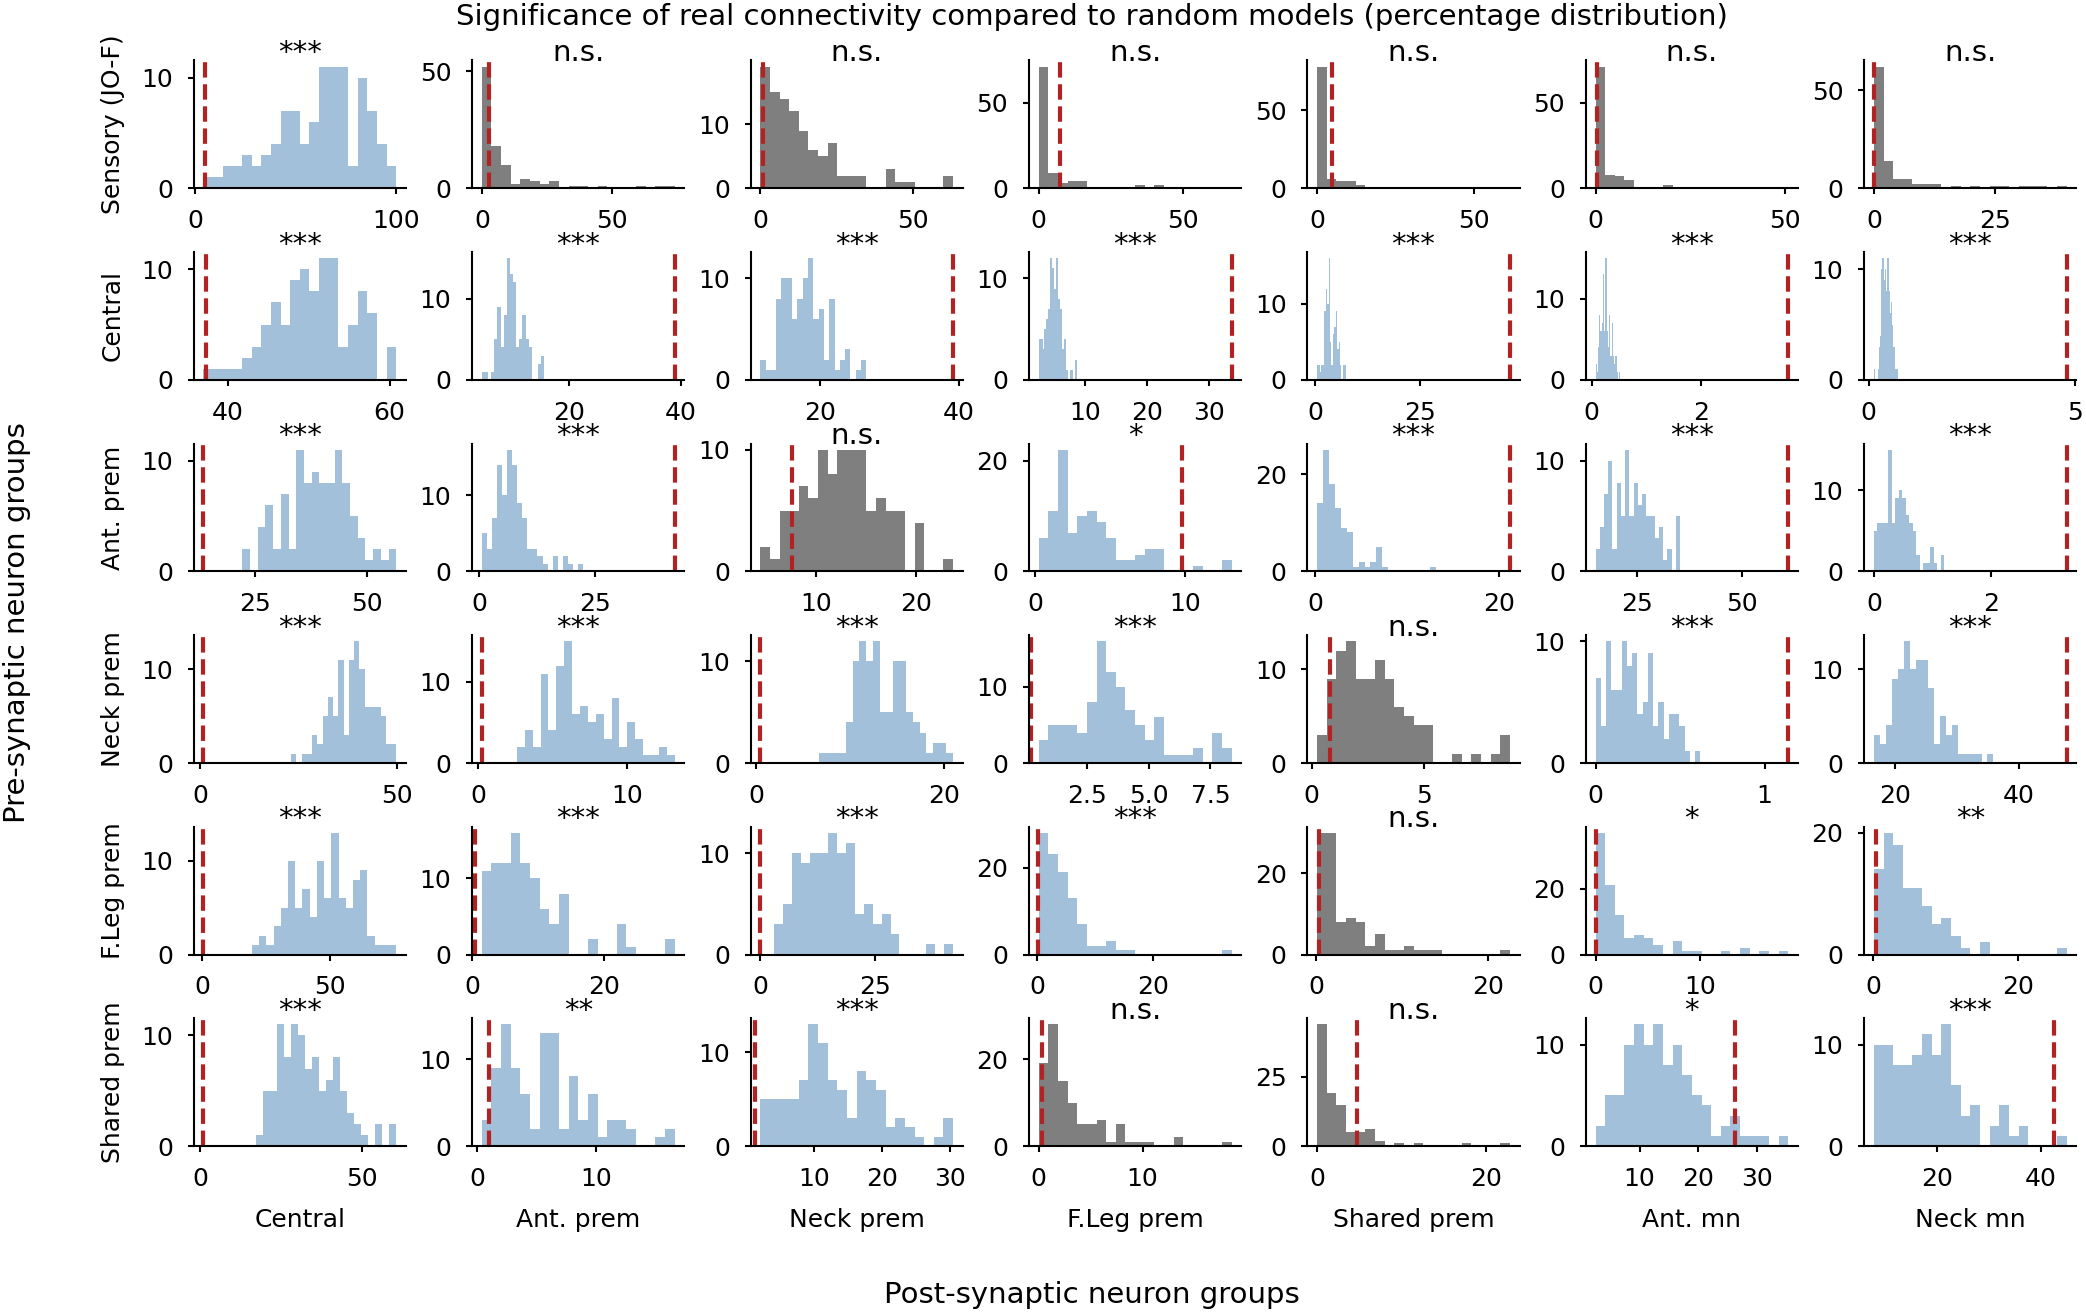

In [8]:
with plt.style.context("./config.mplstyle"):
    fig, axs = plt.subplots(
        6,
        7,
        figsize=(FIGSIZE["width"] * 5.5, FIGSIZE["length"] * 4.50),
        sharex=False,
        sharey=False,
    )

    for pre_id in range(percentage_real_matrix.shape[0]):
        for post_id in range(percentage_real_matrix.shape[1]):

            observed_value = percentage_real_matrix[pre_id, post_id]
            distribution = percentage_random_matrices[:, pre_id, post_id]

            percentile = get_percentile(distribution, observed_value)
            significance = get_significance(percentile)

            dist_color = "black" if significance == "n.s." else "steelblue"

            sns.histplot(
                distribution,
                ax=axs[pre_id, post_id],
                bins=20,
                color=dist_color,
                alpha=0.5,
                lw=0,
            )
            axs[pre_id, post_id].axvline(
                observed_value, color="firebrick", linestyle="--", lw=1
            )
            axs[pre_id, post_id].set_title(significance, y=0.8)

            if post_id == 0:
                axs[pre_id, post_id].set_ylabel(neuron_group_names_pre[pre_id])
            else:
                axs[pre_id, post_id].set_ylabel("")
            if pre_id == percentage_real_matrix.shape[0] - 1:
                axs[pre_id, post_id].set_xlabel(neuron_group_names_post[post_id])
            else:
                axs[pre_id, post_id].set_xlabel("")

    fig.text(0.5, -0.06, "Post-synaptic neuron groups", ha="center")
    fig.text(-0.05, 0.5, "Pre-synaptic neuron groups", va="center", rotation="vertical")
    fig.suptitle(
        "Significance of real connectivity compared to random models (percentage distribution)",
        y=1.01,
    )
    plt.tight_layout(pad=-0.05)
    fig.savefig(
        EXPORT_PATH / "EDFig9_panelC.png",
        bbox_inches="tight",
        dpi=300,
    )
    plt.show()

## Panel N of Figure 4

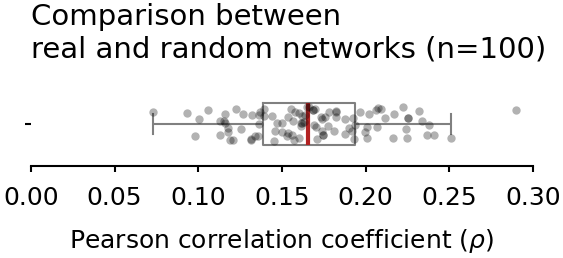

In [9]:
with plt.style.context("./config.mplstyle"):
    fig, ax = plt.subplots(
        1, 1, figsize=(FIGSIZE["width"] * 1.8, FIGSIZE["length"] * 0.4)
    )
    sns.boxplot(
        data=pearson_scores,
        fill=False,
        showfliers=False,
        linewidth=0.5,
        orient="h",
        width=0.5,
        palette=["grey"],
        medianprops=dict(color="firebrick", linewidth=1),
    )
    # plot individual data points
    sns.stripplot(
        data=pearson_scores,
        jitter=0.2,
        color="black",
        size=2,
        linewidth=0.0,
        alpha=0.3,
        orient="h",
    )
    ax.set_xlim(0, 0.3)
    ax.spines['left'].set_visible(False)
    # ax.set_ylim(0.9, 1.1)
    ax.set_xlabel(r"Pearson correlation coefficient ($\rho$)")
    # ax.set_ylabel()
    ax.set_title("Comparison between\nreal and random networks (n=100)", loc="left")
    fig.savefig(
        EXPORT_PATH / "Fig4_panelN.png", bbox_inches="tight", dpi=300
    )
    plt.show()